In [ ]:
import random
import math
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def read_dataset(filename):
    # Read and parse the dataset from a file
    data = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            sentence, label = line.strip().split('\t')
            data.append((sentence, int(label)))
    return data


In [ ]:
def split_dataset(dataset, train_size=0.8):
    # Split the dataset into training and testing sets
    random.shuffle(dataset)
    split = int(len(dataset) * train_size)
    train_set = dataset[:split]
    test_set = dataset[split:]
    return train_set, test_set



In [ ]:
def train_naive_bayes(train_set, M):
    # Train Naive Bayes classifier
    class_word_counts = {0: Counter(), 1: Counter()}
    vectorizer = set()

    for text, label in train_set:
        words = text.split()
        vectorizer.update(words)
        class_word_counts[label].update(words)

    wordlog_of_prob_class = {0: {}, 1: {}}
    V = len(vectorizer)

    for label, word_count in class_word_counts.items():
        for word in word_count:
            count = M + word_count[word]
            probability = count / (V * M + sum(word_count.values()))
            if probability !=0:
              log_of_prob=math.log(probability)
            wordlog_of_prob_class[label][word] = log_of_prob

    return wordlog_of_prob_class, vectorizer



In [ ]:
def predict_naive_bayes(text, word_log_probs, vectorizer):
    # Predict the label for a text using Naive Bayes
    words = text.split()
    log_prob_class = [math.log(0.5) for _ in range(2)]

    for label in [0, 1]:
        for word in words:
            if word in vectorizer:
                log_prob_class[label] += word_log_probs[label].get(word, -10000000)

    return log_prob_class.index(max(log_prob_class))


In [ ]:
def evaluate_accuracy(test_set, word_log_probs, vectorizer):
    # Evaluate the accuracy of Naive Bayes on the test set
    correct = 0

    for text, label in test_set:
        predicted_label = predict_naive_bayes(text, word_log_probs, vectorizer)
        if predicted_label == label:
            correct += 1

    accuracy = correct / len(test_set)
    return accuracy



In [ ]:
def k_fold_cross_validation(data, M, k=10):
    # Perform k-fold cross-validation
    random.shuffle(data)
    fold_size = len(data) // k
    mean_accuracies = []
    sd=0

    for i in range(k):
        test_fold = data[i * fold_size: (i + 1) * fold_size]
        train_fold = data[:i * fold_size] + data[(i + 1) * fold_size:]

        word_log_probs, vectorizer = train_naive_bayes(train_fold, M)
        accuracy = evaluate_accuracy(test_fold, word_log_probs, vectorizer)
        mean_accuracies.append(accuracy)
        sd=np.std(mean_accuracies)

    return mean_accuracies



In [ ]:
#working on the amazon data
def amazon():
    amazon_data= read_dataset("/content/amazon_cells_labelled.txt")

    # for M in range(0,2):
    #   mean_accuracies= k_fold_cross_validation(amazon_data, M)
    # plt.errorbar(sd, mean_accuracies, fmt='o-', color='brown')
    # plt.xlabel('Standard deviation')
    # plt.ylabel('Accuracy')
    # plt.title('Accuracy vs Standard deviation for Amazon data')
    # plt.grid(True)
    # plt.legend()
    # plt.show()

    smoothing_factors = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    accuracies = []
    std1=[]
    std2=[]

    for M in smoothing_factors:
        mean_accuracies = k_fold_cross_validation(amazon_data, M)
        avg_accuracy = np.mean(mean_accuracies)
        accuracies.append(avg_accuracy)


    plt.errorbar(smoothing_factors, accuracies, fmt='o-', color='brown')
    plt.xlabel('Smoothing factor (M)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Smoothing factor for Amazon data')
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
#working on the imdb data
def imdb():
    imdb_data = read_dataset("/content/imdb_labelled.txt")

    smoothing_factors = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    accuracies = []
    sd=[]

    for M in smoothing_factors:
        mean_accuracies = k_fold_cross_validation(imdb_data, M)
        avg_accuracy = np.mean(mean_accuracies)
        accuracies.append(avg_accuracy)


    plt.errorbar(smoothing_factors, accuracies, fmt='o-', color='blue')
    plt.xlabel('Smoothing Factor (M)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Smoothing Factor for Imdb data')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
#working on yelp data
def yelp():
    yelp_data= read_dataset("/content/yelp_labelled.txt")

    smoothing_factors = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    accuracies = []

    for M in smoothing_factors:
        mean_accuracies = k_fold_cross_validation(yelp_data, M)
        avg_accuracy = np.mean(mean_accuracies)
        accuracies.append(avg_accuracy)



    plt.errorbar(smoothing_factors, accuracies, fmt='o-', color='green')
    plt.xlabel('Smoothing Factor (M)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Smoothing Factor for Yelp data')
    plt.grid(True)
    plt.legend()
    plt.show()

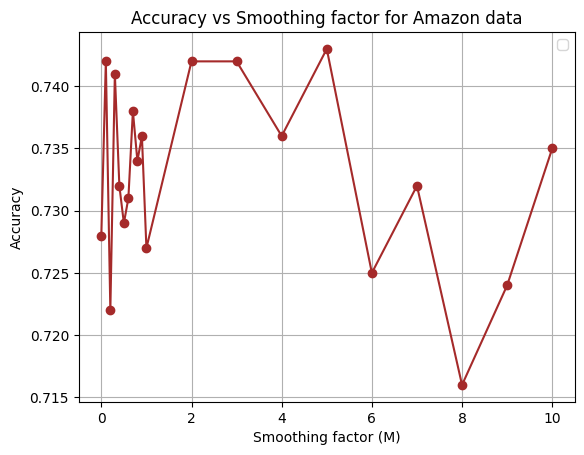

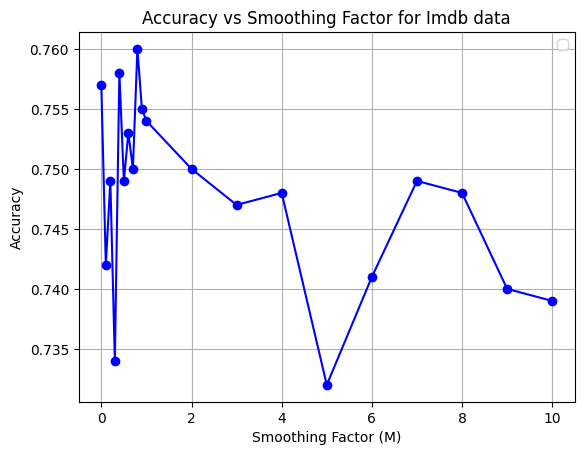

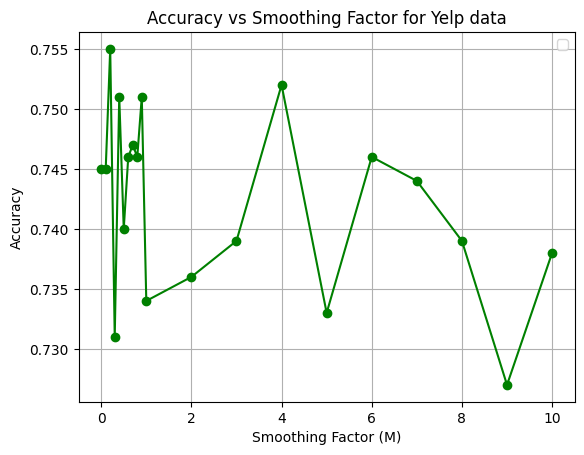

In [ ]:
amazon()
imdb()
yelp()